### Necessary packages

- scikit-image (skimage)
- scipy
- matplotlib
- numpy
- IPython

If you are using Canopy or Anaconda, you wouldn't need any additional packages for this lab. If needed, you can install packages using `pip install` or `conda install` depending on your environment.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from skimage.segmentation import slic
from __future__ import print_function

# Part 2: Image Segmentation 

We introduced working with images in the last lab. 

### Can you think of methods to find specific elements in an image?

There are multiple ways to pose this question, include object detection, object recognition, and semantic segmentation. 

We will look at the task of `image segmentation` in this lab. The goal will be to split an image into regions that are the same 'thing'. In this lab, we will attempt to implement a simple model.

### How do we define a segment?

We can work with a simplistic model that the same 'thing' will have similar color. If we make this assumption, we can make use of clustering algorithms to attempt segmentation.

## <span style="color:blue">Exercise 1</span>

1. Give 1 potential pitfall when using such a simplistic assumption

Your answer here:

# Segmentation using K-Means

As we have learnt from the previous lab, an image is merely a collection of RGB values. We can ignore the spatial arrangement of every pixel, and treat each one of them as a 3-dimensional vector. Pixels with similar RGB values will be close to each other in a 3 dimensional space.

This will allow us to formulate the segmentation problem as follows:
1. Decide on the number of segments,$k$, in the image
2. Reshape the image into a $(w*h) \times 3$ vector, where each row is a pixel's RGB values
3. Run the K-Means algorithm using this as the training data. 

To visualize the clustering, we will replace all pixels in the cluster with a single color. 

## <span style="color:blue">Exercise 2</span>

Implement the algorithm described above using the existing KMeans function from `sklearn`

Alert: This may take around 40 seconds per clustering. 

In [24]:
def get_kmeans_labels(image, K=20, random_state=0):
    ''' Function to get the K-means labels
        for each pixel in the image
        Args:
            image: [ndarray (M x N x n_channels)] RGB image
            K: [int] number of clusters
        Returns:
            labels: [ndarray (M x N)] label image same 
                    width and height as original image
        Hint: 
            - Use the KMeans function from sklearn already imported
            - set the number of clusters and random state
            - reshape image array to a img_shape[0]*img_shape[1] x 3 array 
              before feeding it to the KMeans
            - remember to reshape the output labels for KMeans.fit()
            - Make sure to try different random_state parameters for KMeans
               and choose the one that you think works best.
    '''
    
    # your code here
    newimage = np.reshape(image, (image.shape[0] * image.shape[1], image.shape[2]))
    KM=KMeans(n_clusters=K, random_state=0)
    KM.fit(newimage)
    labels = KM.labels_.reshape((image.shape[0],image.shape[1]))
    return labels

In [25]:
def mean_color(image, labels):
    ''' Function to map labels to average color of the segment.
        You do not need to change this function.
        Args:
            image: [ndarray (M x N x 3)] RGB image
            labels: [ndarray (M x N)] segmentation labels
        Returns:
            out: [ndarray (M x N x 3)] Mean color image
    '''
    out = np.zeros_like(image)
    for label in np.unique(labels):
        indices = np.nonzero(labels == label)
        out[indices] = np.mean(image[indices], axis=0)
    return out

In [26]:
img = np.array(plt.imread('data/bird.jpg')).copy()

### Use the function above to segment the image with K=5, 10 and 20

In [27]:
%%time

kmeans_5_labels  = get_kmeans_labels(img,  5, 0)
kmeans_10_labels = get_kmeans_labels(img, 10, 0)
kmeans_20_labels = get_kmeans_labels(img, 20, 0)

CPU times: user 41.8 s, sys: 14.3 s, total: 56 s
Wall time: 56.2 s


### Visualize the segmentations

Use the function mean_color defined above to show the original image and the segmented image for each K above.

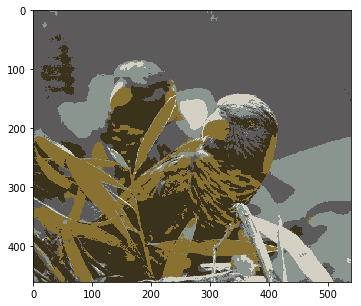

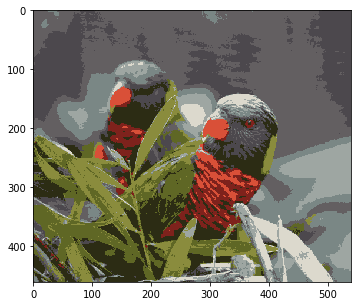

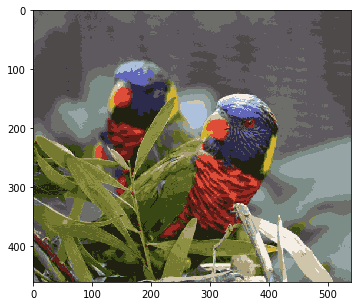

In [28]:
# Your code here
color5= mean_color(img, kmeans_5_labels)
plt.figure(figsize=(12,5))
plt.imshow(color5)

color10= mean_color(img, kmeans_10_labels)
plt.figure(figsize=(12,5))
plt.imshow(color10)

color20= mean_color(img, kmeans_20_labels)
plt.figure(figsize=(12,5))
plt.imshow(color20)

## <span style="color:blue">Exercise 3</span>
Comment on the results for values of K=5, 10 and 20. What K would you pick out of the three. Do you think a higher K value would help?

Your answer here: I would pick K=20, by comparing from the graphs. I think a higher K value would help, but after some point, the image should be the same no matter how bigger K is.

## <span style="color:blue">Exercise 4</span>

We can extend the idea to also include the location values in addition to the RGB values. In this case, pixels with similar RGB values which are located nearby will be close to each other in a 5 dimensional space.

This will allow us to formulate the segmentation problem as follows:
1. Decide on the number of segments,$k$, in the image
2. Reshape the image into a $(w*h) \times 3$ and augment with $(w*h) \times 2$ location vector, where each row is a pixel's RGBxy values
3. Run the K-Means algorithm using this as the training data. 

Your task: modify the input to the K-Means function above and re-use the same function to perform segmentation along with x,y coordinates

In [32]:
# Use the mgrid function from numpy to generate x and y coordinates for the entire image
# augment these along the 3rd axis (axis = 2) using dstack from numpy 
# use this x-y-augmented image as input to the previously defined K-Means labeling function

# Your code here:
xcoords, ycoords = np.mgrid[0:img.shape[0],0:img.shape[1]]
img_xy = np.dstack([img, xcoords])
img_xy = np.dstack([img_xy, ycoords])

### Use the function above to segment the image with K=5, 10 and 20 along with x and y coordinates

In [33]:
%%time

kmeans_5xy_labels  = get_kmeans_labels(img_xy,  5, 42)
kmeans_10xy_labels = get_kmeans_labels(img_xy, 10, 42)
kmeans_20xy_labels = get_kmeans_labels(img_xy, 20, 42)

CPU times: user 42 s, sys: 14.6 s, total: 56.6 s
Wall time: 56.4 s


### Visualize the segmentations

Use the function mean_color defined above to show the original image and the segmented image for each K above.

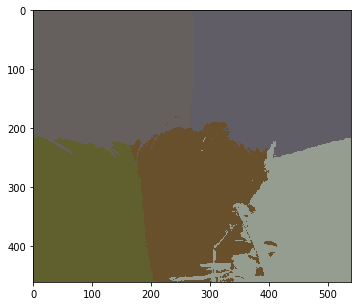

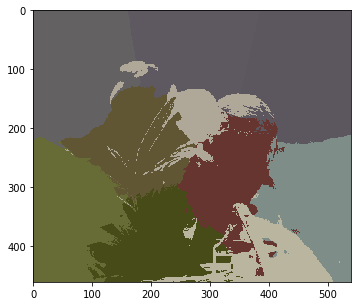

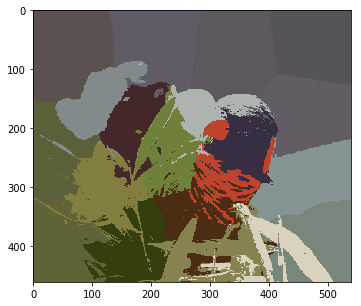

In [34]:
# Your code here
color5= mean_color(img, kmeans_5xy_labels)
plt.figure(figsize=(12,5))
plt.imshow(color5)

color10= mean_color(img, kmeans_10xy_labels)
plt.figure(figsize=(12,5))
plt.imshow(color10)

color20= mean_color(img, kmeans_20xy_labels)
plt.figure(figsize=(12,5))
plt.imshow(color20)

## <span style="color:blue">Exercise 5</span>

# SLIC superpixel segmentation
This is the idea behind the SLIC superpixel segmentation. SLIC is implemented in a different colorspace called the LAB colorspace and follows a similar idea. [paper](https://infoscience.epfl.ch/record/177415/files/Superpixel_PAMI2011-2.pdf).

Use the `slic()` function from skimage.segmentation, imported above to perform the SLIC segmentation

In [37]:
def get_slic_segmentation(image, num_segments):
    ''' Function to get the K-means labels for each pixel in the image
        Args:
            image: [ndarray (M x N x n_channels)] RGB image
            num_segments: [int] number of segments desired
        Returns:
            labels: [ndarray (M x N)] label image same 
                    width and height as original image
        Hint: 
            - Use the slic() function from skimage.segmentation
            - Pass the image and num_segments
            - You can vary the 'compactness' factor to vary the
              weight assigned to the x-y coordinates
    '''
    
    # Your code here
    labels = slic(image, n_segments= num_segments, compactness= 10)
    return labels

### Use the function above to segment the image with num_segments= 10, 50, 100, 200, 500

In [38]:
%%time

slic_10_labels  = get_slic_segmentation(img, 10)
slic_50_labels  = get_slic_segmentation(img, 50)
slic_100_labels = get_slic_segmentation(img, 100)
slic_200_labels = get_slic_segmentation(img, 200)
slic_500_labels = get_slic_segmentation(img, 500)

CPU times: user 1.31 s, sys: 111 ms, total: 1.42 s
Wall time: 1.47 s


### Visualize the segmentations

Use the function mean_color defined above to show the original image and the segmented image for each num_segments above.

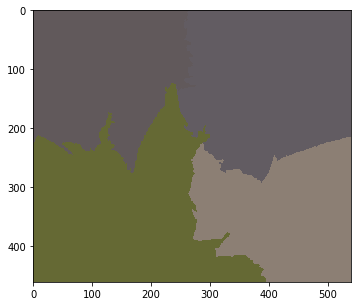

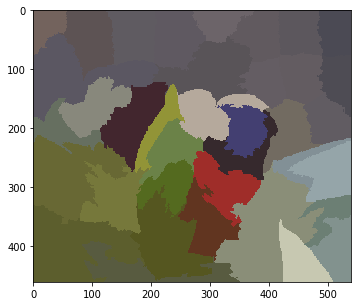

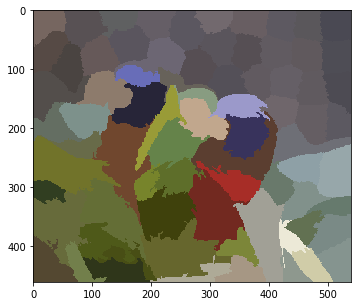

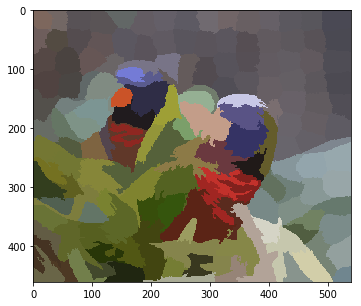

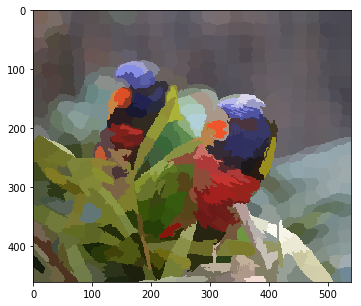

In [40]:
# Your code here
color10= mean_color(img, slic_10_labels)
plt.figure(figsize=(12,5))
plt.imshow(color10)

color50= mean_color(img, slic_50_labels)
plt.figure(figsize=(12,5))
plt.imshow(color50)

color100= mean_color(img, slic_100_labels)
plt.figure(figsize=(12,5))
plt.imshow(color100)

color200= mean_color(img, slic_200_labels)
plt.figure(figsize=(12,5))
plt.imshow(color200)

color500= mean_color(img, slic_500_labels)
plt.figure(figsize=(12,5))
plt.imshow(color500)

### Which segmentation do you think is better: KMeans or SLIC?

Your answer: SLIC is better

### Mention the drawback(s) of K-Means that SLIC fixes. 

Your answer: K-means is slower than SLIC, and K-Means only showed one bird clearly in graphs above

### What are some drawbacks of SLIC for finding elements/objects in the image?

Your answer: The SLIC got a great performance at k = 200. However, there is no big difference in the image when k increase to 500.

## <span style="color:blue">Exercise 6</span>


Use the best setting of KMeans or SLIC on the two images of a daily object you took in the last lab.

Display the segmentation of both. Which image's segmentation is better? Reason why.

In [49]:
outdoor = np.array(plt.imread('outdoor.jpg')).copy()
indoor = np.array(plt.imread('indoor.jpg')).copy()


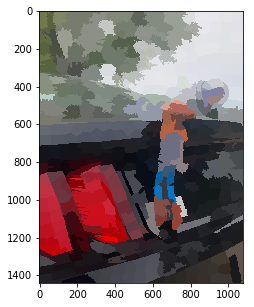

In [50]:
slic_500_labels = get_slic_segmentation(outdoor, 500)
color500= mean_color(outdoor, slic_500_labels)
plt.figure(figsize=(12,5))
plt.imshow(color500)

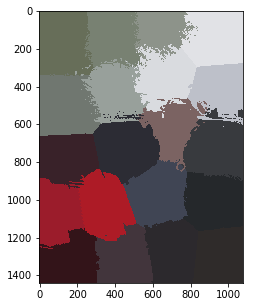

In [51]:
xcoords, ycoords = np.mgrid[0:outdoor.shape[0],0:outdoor.shape[1]]
img_xy = np.dstack([outdoor, xcoords])
img_xy = np.dstack([img_xy, ycoords])
kmeans_20xy_labels = get_kmeans_labels(img_xy, 20, 42)
color20= mean_color(outdoor, kmeans_20xy_labels)
plt.figure(figsize=(12,5))
plt.imshow(color20)

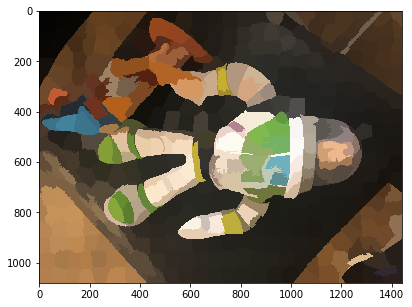

In [52]:
slic_500_labels = get_slic_segmentation(indoor, 500)
color500= mean_color(indoor, slic_500_labels)
plt.figure(figsize=(12,5))
plt.imshow(color500)

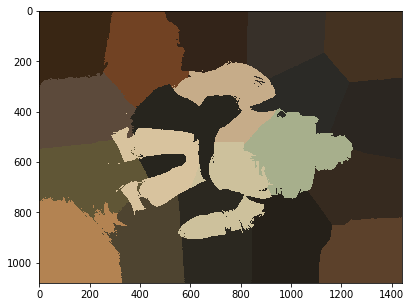

In [53]:
xcoords, ycoords = np.mgrid[0:indoor.shape[0],0:indoor.shape[1]]
img_xy = np.dstack([indoor, xcoords])
img_xy = np.dstack([img_xy, ycoords])
kmeans_20xy_labels = get_kmeans_labels(img_xy, 20, 42)
color20= mean_color(indoor, kmeans_20xy_labels)
plt.figure(figsize=(12,5))
plt.imshow(color20)

From the graphs above, it's clear that SLIC is better. K-means takes 10 mins to run these two pics, and not clear at all